# Lagrange Interpolation

In [16]:
using Plots
using Printf

In [17]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

## Example 1
Visualize some Lagrange Interpolating polynomials.  Note that Julia array indexing begins with one.

In [18]:
x_nodes = [1, 1.5, 3, 3.5, 5]; # n = 4 here

In [19]:
@show k = 3; # which L_{n,k} we construct
@show n = length(x_nodes)-1; # degree of interpolant

xx = LinRange(1, 5, 100); # plot between 1 and 5
Lnk = ones(length(xx));

# textbook indexing in j and j+1 for Julia
for j in 0:k-1
    @. Lnk *= (xx - x_nodes[j+1])/(x_nodes[k+1] -  x_nodes[j+1])
end

for j in k+1:n
    @. Lnk *= (xx - x_nodes[j+1])/(x_nodes[k+1] -  x_nodes[j+1])
end


k = 3 = 3
n = length(x_nodes) - 1 = 4


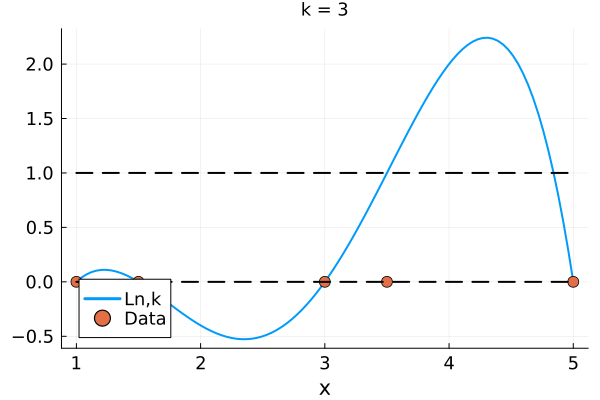

In [20]:
plot(xx, Lnk,label="Ln,k", legend=:bottomleft)
scatter!(x_nodes, zeros(n+1), label="Data")
plot!(xx, zeros(length(xx)),label="", ls=:dash, color=:black)
plot!(xx, ones(length(xx)),label="", ls=:dash, color=:black)
xlabel!("x")
title!(@sprintf("k = %d", k))


## Example 2
Examine the Lagrange interpolant of $f(x) =1/x$ through the nodes $x_0 =1$, $x_1 = 3$, and $x_2 = 5$.

In [21]:
x_nodes = [1., 3., 5.];

f = x-> 1/x;

L0 = x-> (x^2 - 8*x + 15)/8;
L1 = x-> -(x^2 - 6*x + 5)/4;
L2 = x-> (x^2 - 4*x + 3)/8;

# note that Julia indexes arrays starting at 1
P= x-> f(x_nodes[1])*L0(x) + f(x_nodes[2])*L1(x) + f(x_nodes[3])*L2(x);

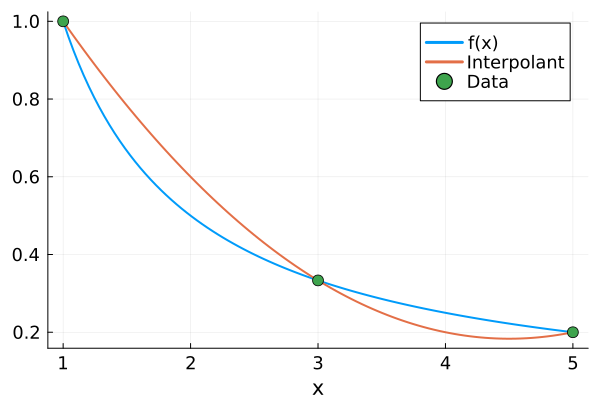

In [22]:
xx = LinRange(1,5,100);

plot(xx, f.(xx), label="f(x)")
plot!(xx, P.(xx),label="Interpolant")
scatter!(x_nodes, f.(x_nodes),label="Data")
xlabel!("x")


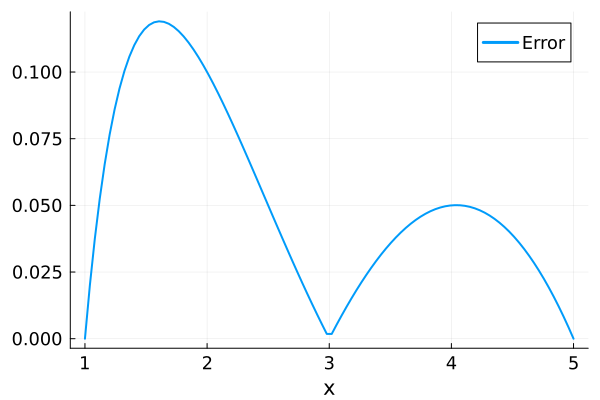

In [23]:
xx = LinRange(1,5,100);

plot(xx, (@. abs(f(xx) - P(xx))), label="Error")
xlabel!("x")


In [24]:
@show abs(f(2) - P(2));

abs(f(2) - P(2)) = 0.09999999999999998


Consider what happens when we go outside of the region where we have data.

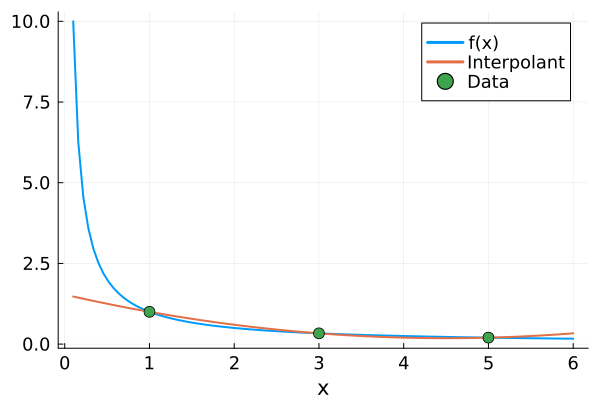

In [25]:
xx = LinRange(0.1,6,100);

plot(xx, f.(xx), label="f(x)")
plot!(xx, P.(xx),label="Interpolant")
scatter!(x_nodes, f.(x_nodes),label="Data")
xlabel!("x")


## Example 3
**Overfitting**, or why we must be careful with Lagrange. 

Observe what happens as the number of nodes gets too large.  For convenience, this generates the Lagrange interpolant using the `DataInterpolations` module, and the `LagrangeInterpolation` function.

In [26]:
using DataInterpolations

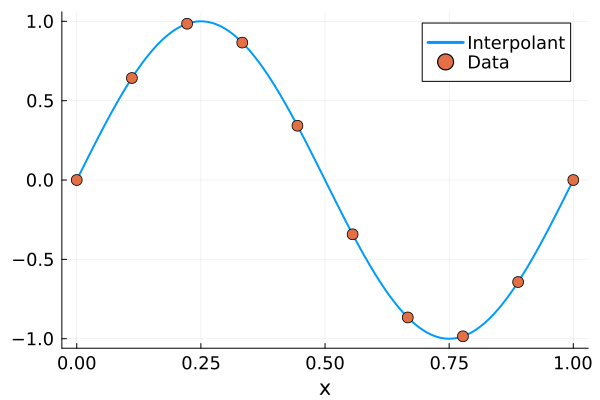

In [27]:
x_nodes = LinRange(0,1,10); # try 66
y_nodes = @. sin(2* π * x_nodes);
p = LagrangeInterpolation(y_nodes, x_nodes)

xx = LinRange(0,1,5000);
plot(xx, p.(xx),label="Interpolant")
scatter!(x_nodes, y_nodes, label="Data")
# xlims!(.9, 1)
xlabel!("x")

In [28]:
p

LagrangeInterpolation with 10 points, with order 9
┌──────────┬──────────────┐
│     time │            u │
├──────────┼──────────────┤
│      0.0 │          0.0 │
│ 0.111111 │     0.642788 │
│ 0.222222 │     0.984808 │
│ 0.333333 │     0.866025 │
│ 0.444444 │      0.34202 │
│ 0.555556 │     -0.34202 │
│ 0.666667 │    -0.866025 │
│ 0.777778 │    -0.984808 │
│ 0.888889 │    -0.642788 │
│      1.0 │ -2.44929e-16 │
└──────────┴──────────────┘


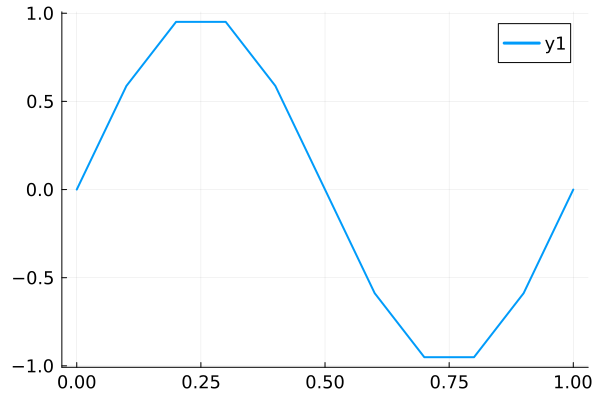

In [29]:
x_=0:0.1:1;
plot(x_, p.(x_))

In [30]:
-5:0.1:5

-5.0:0.1:5.0

In [31]:
-5:0.1:5|>collect

101-element Vector{Float64}:
 -5.0
 -4.9
 -4.8
 -4.7
 -4.6
 -4.5
 -4.4
 -4.3
 -4.2
 -4.1
  ⋮
  4.2
  4.3
  4.4
  4.5
  4.6
  4.7
  4.8
  4.9
  5.0